Task 1: Feature Engineering

1.1: Identify 5 Unique features from this data set
    a. Tid
    b. Linjenavn
    c. Fylke
    d. Område
    e. Kommune

1.2: Apply feature engineering on them in Python

In [95]:
#imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [96]:
#First i save the url as a variable
url ='https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
#Reading the csv from the URL given above and telling python that the separator/delimiter is ';'
df = pd.read_csv(url, sep=';')

#Showing the table (I tried importing everything (head(6001)), but it realy f*ked my computer)
df.head()


,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [97]:
#Converting the two columns for actual time at the busstops to timedelta
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_timedelta(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')

#Finding the time each bus spent on a busstop
df['faktisk_Holdeplass_tid_differanse'] = df.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra-df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra

dfTime=df[['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra','Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'faktisk_Holdeplass_tid_differanse']]
dfTime.head()


,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,faktisk_Holdeplass_tid_differanse
0,0 days 10:53:53,0 days 10:53:59,0 days 00:00:06
1,0 days 13:12:20,0 days 13:12:26,0 days 00:00:06
2,0 days 10:18:56,0 days 10:19:21,0 days 00:00:25
3,0 days 13:52:04,0 days 13:52:26,0 days 00:00:22
4,0 days 07:34:13,0 days 07:34:53,0 days 00:00:40


In [98]:
#Creating new column for Linjetype with numbers instead of text
df['num_Linjetype'] = df.Linjetype
df["num_Linjetype"] = df["num_Linjetype"].replace({'Lokal': '1', 'Ekspress': '2', 'Skole': '3', 'Natt': '4'})
df.head()

dfLinjetype=df[['Linjetype','num_Linjetype']]
dfLinjetype.head()

,Linjetype,num_Linjetype
0,Lokal,1
1,Lokal,1
2,Lokal,1
3,Lokal,1
4,Lokal,1


In [99]:
#Creating new column for Fylke with numbers instead of text
df['num_Fylke'] = df.Fylke
df["num_Fylke"] = df["num_Fylke"].replace({'Oslo': '1', 'Viken': '2'})
df.head()

dfFylke=df[['Fylke','num_Fylke']]
dfFylke.head()

,Fylke,num_Fylke
0,Viken,2
1,Viken,2
2,Viken,2
3,Viken,2
4,Viken,2


In [100]:
#Creating new column for Område with numbers instead of text
df['num_Område'] = df.Område
df["num_Område"] = df["num_Område"].replace({'Nordøst': '1', 'Vest': '2', 'Sør': '3', 'Indre By': '4'})
df.head()

dfOmråde=df[['Område','num_Område']]
dfOmråde.head()

,Område,num_Område
0,Vest,2
1,Vest,2
2,Vest,2
3,Vest,2
4,Vest,2


In [101]:
#Creating new column for Kommune with numbers instead of text
df['num_Kommune'] = df.Kommune
df["num_Kommune"] = df["num_Kommune"].replace({'Alna': '1', 'Asker': '2', 'Aurskog-Høland': '3', 'Bjerke': '4', 'Bærum': '5', 'Drammen': '6', 'Eidsvoll': '7',
                                               'Enebakk': '8', 'Frogner': '9', 'Gamle Oslo': '10', 'Gjerdrum': '11', 'Grorud': '12', 'Grünerløkka': '13', 'Hurdal': '14',
                                               'Indre Østfold': '15', 'Lier': '16', 'Lillestrøm': '17', 'Lørenskog': '18', 'Nannestad': '19', 'Nes': '20',
                                               'Nittedal': '21', 'Nordmarka': '22', 'Nordre Aker': '23', 'Nordre Follo': '24', 'Nordstrand': '25', 'Rælingen': '26',
                                               'Sagene': '27', 'Sentrum': '28', 'St.Hanshaugen': '29', 'Stovner': '30', 'Søndre Nordstrand': '31', 'Ullensaker': '32',
                                               'Ullern': '33', 'Vestre Aker': '34'})
dfKommune=df[['Kommune','num_Kommune']]
dfKommune.head()

,Kommune,num_Kommune
0,Bærum,5
1,Bærum,5
2,Bærum,5
3,Bærum,5
4,Bærum,5


In [102]:
#Converting to binary and showing it
df_bin = pd.get_dummies(df, drop_first=True)
df_bin.head()

,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,faktisk_Holdeplass_tid_differanse,TurId_10001-2020-06-03T17:50:00+02:00,TurId_10001-2020-06-04T11:10:00+02:00,TurId_10001-2020-06-10T15:10:00+02:00,TurId_10001-2020-06-13T05:14:00+02:00,...,num_Kommune_31,num_Kommune_32,num_Kommune_33,num_Kommune_34,num_Kommune_4,num_Kommune_5,num_Kommune_6,num_Kommune_7,num_Kommune_8,num_Kommune_9
0,0,0 days 10:53:53,0 days 10:53:59,112,5,0 days 00:00:06,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0 days 13:12:20,0 days 13:12:26,112,5,0 days 00:00:06,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0 days 10:18:56,0 days 10:19:21,112,6,0 days 00:00:25,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0 days 13:52:04,0 days 13:52:26,112,10,0 days 00:00:22,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0 days 07:34:13,0 days 07:34:53,112,10,0 days 00:00:40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [103]:
#Dropping the columns that I think won't make any sense in binary
df_bin = df.drop(["TurId","Fylke","Linjetype","Dato","Område","Kommune","Holdeplass_Fra","Holdeplass_Til","Linjefylke","Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra","Tidspunkt_Faktisk_Avgang_Holdeplass_Fra","Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra","Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], axis=1)
df_bin.head()

,Linjenavn,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord,faktisk_Holdeplass_tid_differanse,num_Linjetype,num_Fylke,num_Område,num_Kommune
0,150,0,112,5,0 days 00:00:06,1,2,2,5
1,150,0,112,5,0 days 00:00:06,1,2,2,5
2,150,0,112,6,0 days 00:00:25,1,2,2,5
3,150,1,112,10,0 days 00:00:22,1,2,2,5
4,150,1,112,10,0 days 00:00:40,1,2,2,5


1.3: Visualize each feature in the form of a graph using Python libraries

<AxesSubplot:>

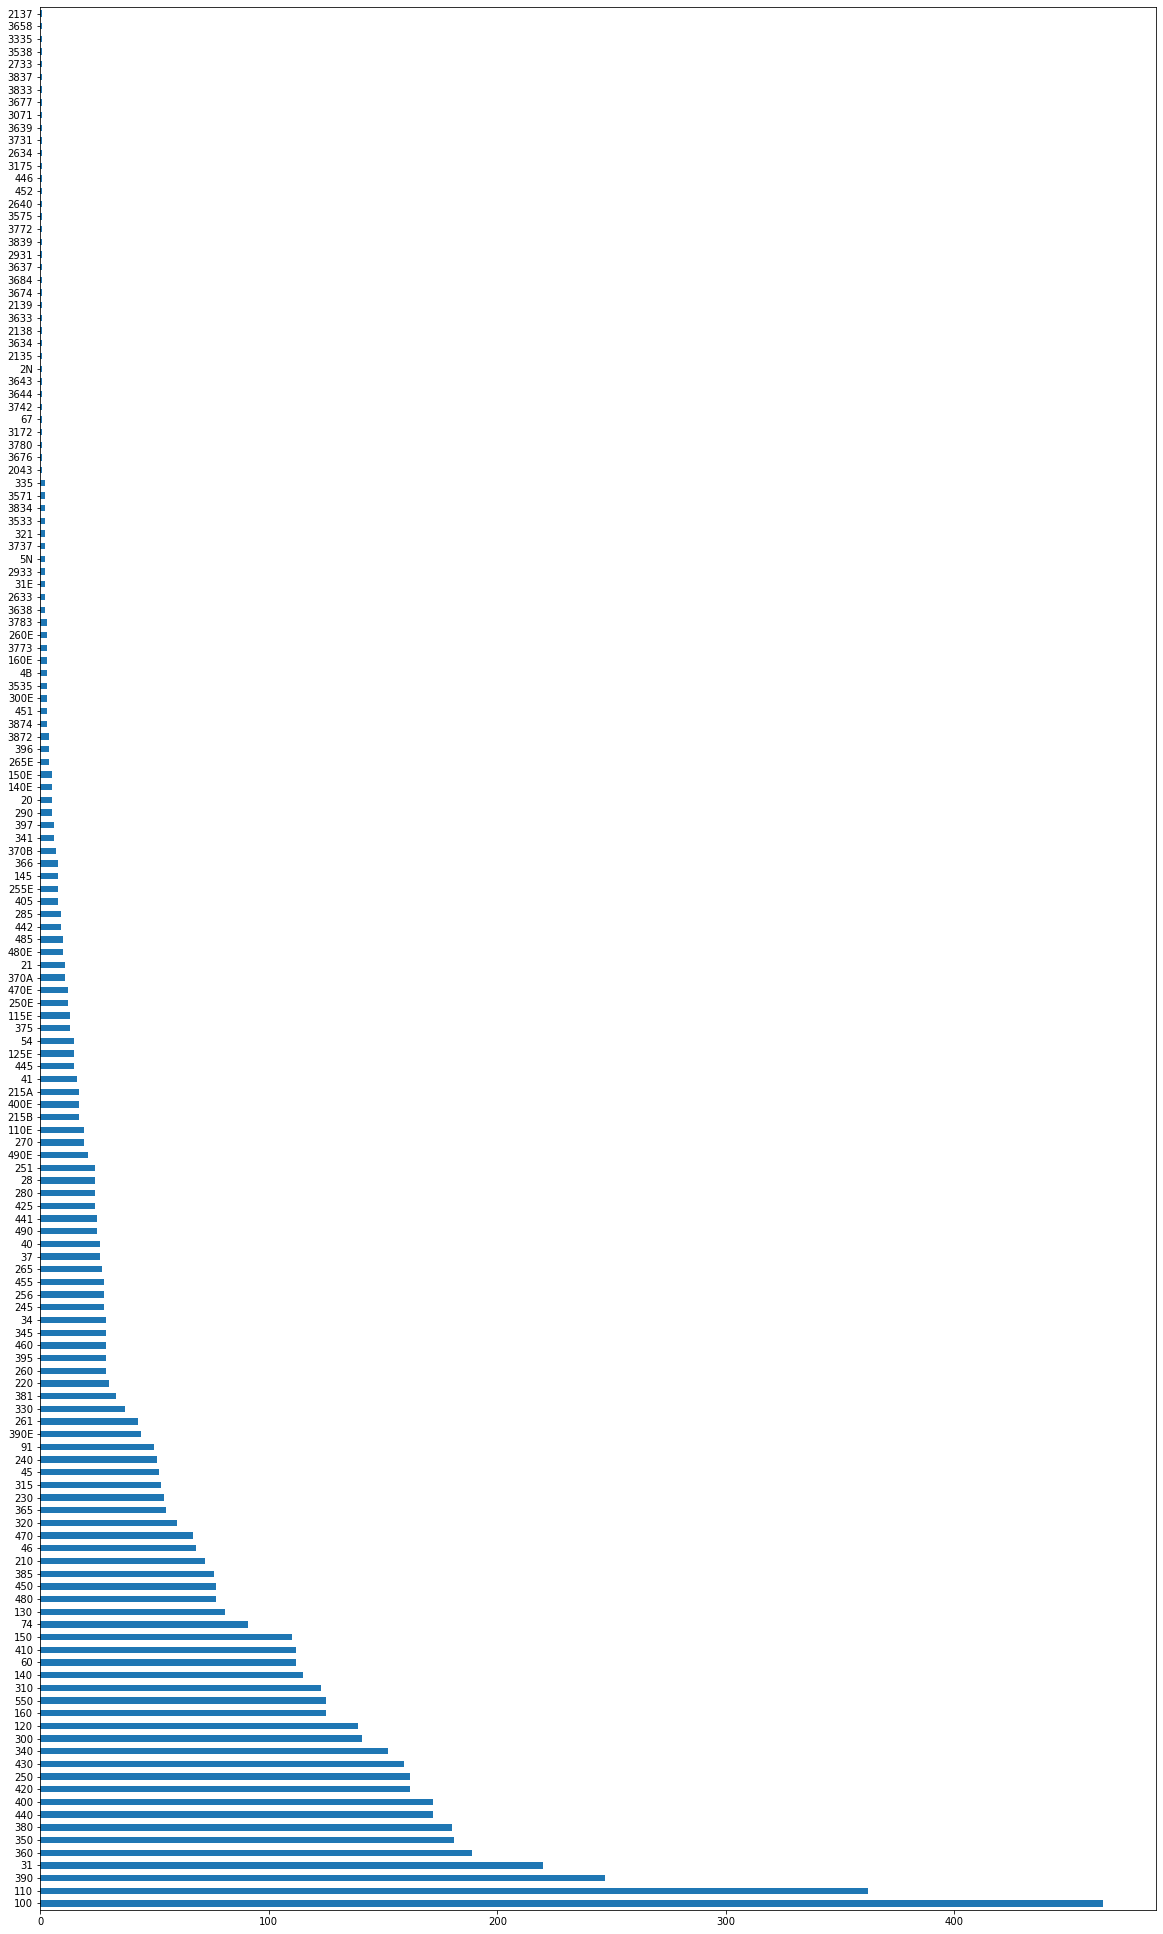

In [104]:
#Counting unique instances of 'Linjenavn' and storing it in a variable n 
n = len(pd.unique(df['Linjenavn']))
#Creating a table based on 'Linjenavn' from the original import of the csv file, and triming it to be readable
df['Linjenavn'].value_counts().head(n).plot(kind='barh',figsize=(20,35))

<AxesSubplot:>

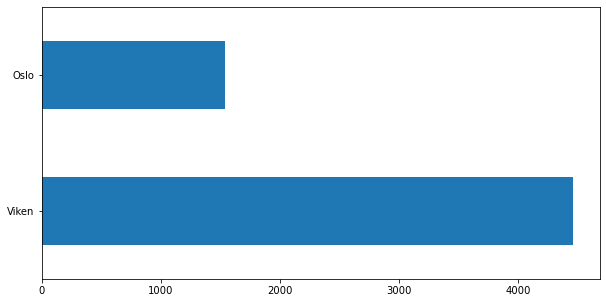

In [105]:
df['Fylke'].value_counts().head().plot(kind='barh',figsize=(10,5))

<AxesSubplot:>

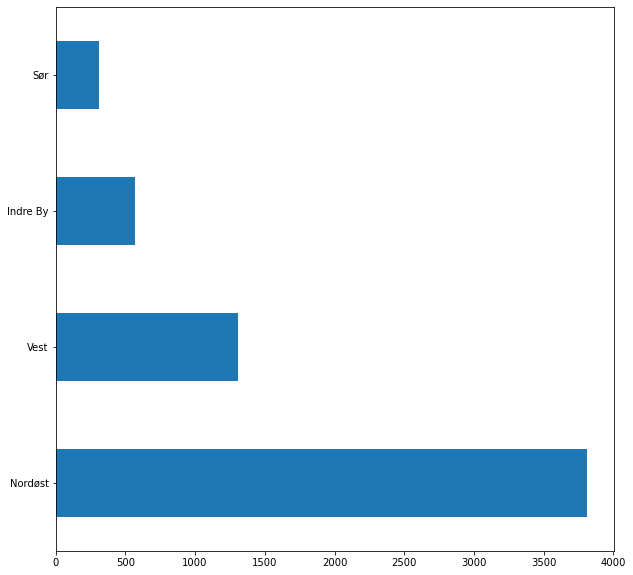

In [106]:
df['Område'].value_counts().head().plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

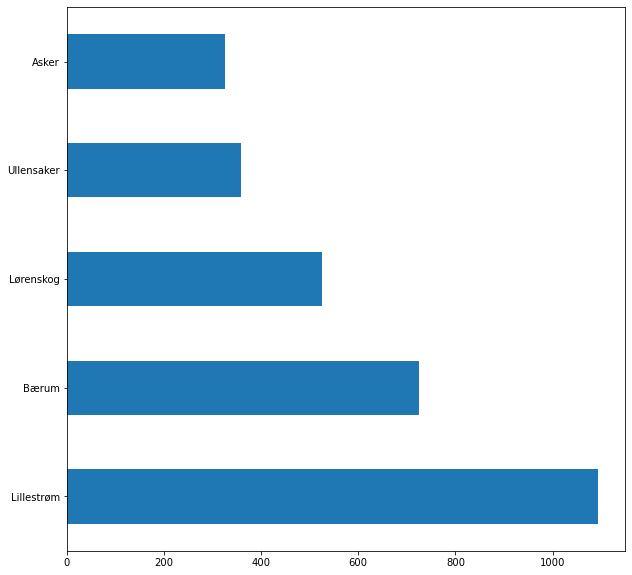

In [107]:
df['Kommune'].value_counts().head().plot(kind='barh',figsize=(10,10))

<AxesSubplot:>

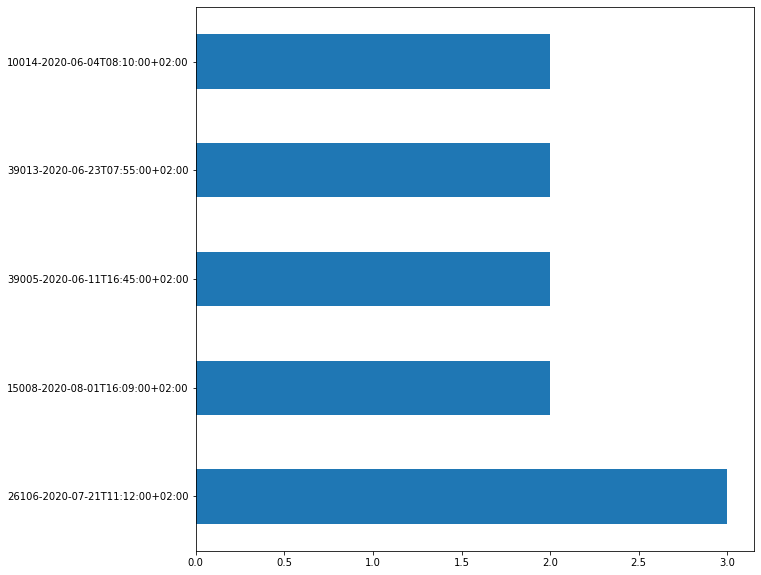

In [108]:
df['TurId'].value_counts().head().plot(kind='barh',figsize=(10,10))

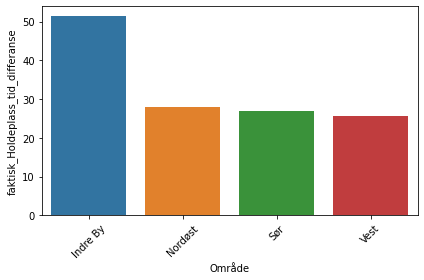

In [109]:
#Calculating average time spent for each area
#Setting the column to get total seconds
#https://stackoverflow.com/questions/44616546/finding-the-mean-and-standard-deviation-of-a-timedelta-object-in-pandas-df
#Source for mean() and totalseconds()
df['faktisk_Holdeplass_tid_differanse'] = df['faktisk_Holdeplass_tid_differanse'].dt.total_seconds()
df_2 = df.groupby('Område', as_index=False)['faktisk_Holdeplass_tid_differanse'].mean()

df_2.head()


#https://www.kaggle.com/questions-and-answers/55356 - Kilde for plottingen av barplot
sns.barplot(x="Område", y='faktisk_Holdeplass_tid_differanse', data=df_2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
